In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer el archivo CSV
csv_file = "/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s7/MangoMass/Harumanis_mango_weight.csv"
data = pd.read_csv(csv_file)

# Directorio de las imágenes
image_dir = "/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s7/MangoMass/images"

# Tamaño común para redimensionar las imágenes
new_size = (100, 100)  # Por ejemplo, 100x100 píxeles

# Función para preprocesar las imágenes de mango
def preprocess_image(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)

    # Redimensionar la imagen
    resized_image = cv2.resize(image, new_size)

    # Convertir a escala de grises
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Aplicar umbralización para identificar el mango en la imagen
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Aplicar la máscara a la imagen original
    mango_only = cv2.bitwise_and(resized_image, resized_image, mask=thresh)

    # Convertir el mango identificado a blanco y el fondo a negro
    mango_only[thresh == 0] = [255, 255, 255]

    return mango_only

# Lista para almacenar los datos preprocesados de las imágenes de mango
preprocessed_images = []

# Iterar sobre el dataframe y preprocesar cada imagen de mango
for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row['no'])
    if os.path.exists(image_path):
        preprocessed_image = preprocess_image(image_path)
        preprocessed_images.append(preprocessed_image)
    else:
        print("Imagen no encontrada:", row['no'])

# Convertir la lista de imágenes preprocesadas a un array numpy
X = np.array(preprocessed_images)

# Obtener el target (pesos de los mangos) del dataframe
y = data['weight']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionar las imágenes para que puedan ser utilizadas como características en la regresión lineal
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_flat, y_train)

# Realizar predicciones
train_predictions = model.predict(X_train_flat)
test_predictions = model.predict(X_test_flat)

# Evaluar el modelo
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("RMSE en el conjunto de entrenamiento:", train_rmse)
print("RMSE en el conjunto de prueba:", test_rmse)
print("R^2 en el conjunto de entrenamiento:", train_r2)
print("R^2 en el conjunto de prueba:", test_r2)


RMSE en el conjunto de entrenamiento: 2.870935979553537e-16
RMSE en el conjunto de prueba: 0.04205508211603078
R^2 en el conjunto de entrenamiento: 1.0
R^2 en el conjunto de prueba: 0.756614250584436


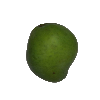

Predicción de peso del mango en la nueva imagen: [0.66924616]


In [31]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Ruta de la nueva imagen
new_image_path = "/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s7/MangoMass/images/192b.jpg"

# Función para preprocesar la nueva imagen y mostrar la información de la predicción
def preprocess_and_predict(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)

    # Redimensionar la imagen al mismo tamaño que las imágenes de entrenamiento
    resized_image = cv2.resize(image, new_size)

    # Convertir a escala de grises
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Aplicar umbralización para identificar el mango en la imagen
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Aplicar la máscara a la imagen original
    mango_only = cv2.bitwise_and(resized_image, resized_image, mask=thresh)

    # Convertir el mango identificado a blanco y el fondo a negro
    mango_only[thresh == 0] = [255, 255, 255]

    # Realizar predicción usando el modelo de regresión lineal entrenado
    flattened_image = mango_only.reshape(1, -1)
    predicted_weight = model.predict(flattened_image)

    # Mostrar la imagen con el mango identificado
    cv2_imshow(mango_only)

    # Mostrar la información de la predicción
    print("Predicción de peso del mango en la nueva imagen:", predicted_weight)

# Preprocesar la nueva imagen y mostrar la información de la predicción
preprocess_and_predict(new_image_path)
